# Simple Linear Regression Example

### Import the relevant libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [6]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

inputs = np.column_stack((xs,zs))

print (inputs.shape)

(1000, 2)


### Generate the targets we will aim at

In [7]:
noise = np.random.uniform(-1, 1, (observations,1))

targets = 2*xs - 3*zs + 5 + noise

print (targets.shape)

(1000, 1)


### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

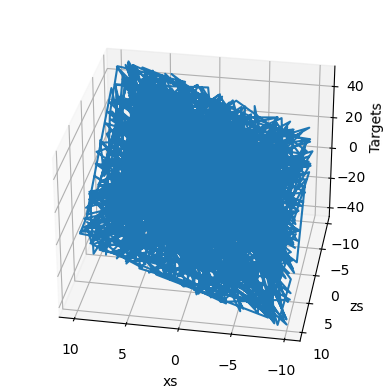

In [9]:
targets = targets.reshape(observations,1)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(xs, zs, targets)

ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

ax.view_init(azim=100)

plt.show()

targets = targets.reshape(observations,1)

### Initialize variables

In [10]:
init_range = 0.1

weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

biases = np.random.uniform(low=-init_range, high=init_range, size=1)

print (weights)
print (biases)

[[-0.02629169]
 [ 0.09398989]]
[0.05280196]


### Set a learning rate

In [11]:
learning_rate = 0.02

### Train the model

In [12]:
for i in range (100):
    
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
        
    loss = np.sum(deltas ** 2) / 2 / observations
    
    print (loss)

    deltas_scaled = deltas / observations

    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)


251.77843732132013
34.404775277950094
13.427517183861994
11.041765762439084
10.434762254000573
10.011944541740519
9.62112619731078
9.247226856537495
8.888256380567222
8.543497606848186
8.212376238533837
7.894351704879203
7.58890587828893
7.295541227235029
7.013779908826939
6.743162981070463
6.483249654411977
6.2336165736767795
5.993857128485846
5.763580790954895
5.542412479589987
5.329991948342689
5.1259731998297715
4.930023921761544
4.741824945660936
4.561069726991613
4.387463845848413
4.220724527396735
4.0605801812798115
3.9067699592436127
3.7590433302588333
3.617159672447909
3.4808878811523645
3.350005992502142
3.2243008218737037
3.1035676166480743
2.9876097227032092
2.8762382640974375
2.769271835422256
2.666536206323391
2.5678640377087834
2.473094609181314
2.3820735572522533
2.294652623909059
2.2106894151279586
2.1300471689379843
2.052594532658703
1.9782053489487308
1.9067584503166135
1.8381374617593278
1.7722306112069277
1.7089305474646213
1.6481341653556894
1.5897424377804628
1.5

### Print weights and biases and see if we have worked correctly.

In [13]:
print (weights, biases)

[[ 1.99856051]
 [-3.00015496]] [4.32925322]


### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

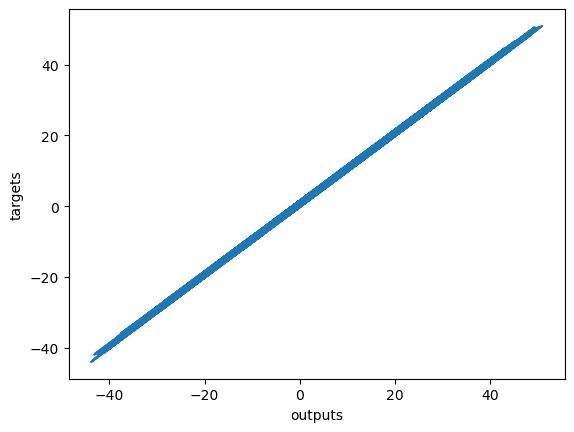

In [14]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()